In [4]:
options(warn=-1)

In [19]:
#libreria para trabajar con archivos raster y shp
library(raster)

# Ejemplo de como abrir un archivo tif y graficarlo

In [20]:
#Ubicar el archivo de temperatura maxima y minima del mes de enero para todo el Perú
tmp_max_enero=raster('d:/Proyectos_GitHub/curso_hidrologia/data/Temperatura/mensual/tmax/Tmax_1981-01-01.tif')
tmp_min_enero=raster('d:/Proyectos_GitHub/curso_hidrologia/data/Temperatura/mensual/tmin/Tmin_1981-01-01.tif')

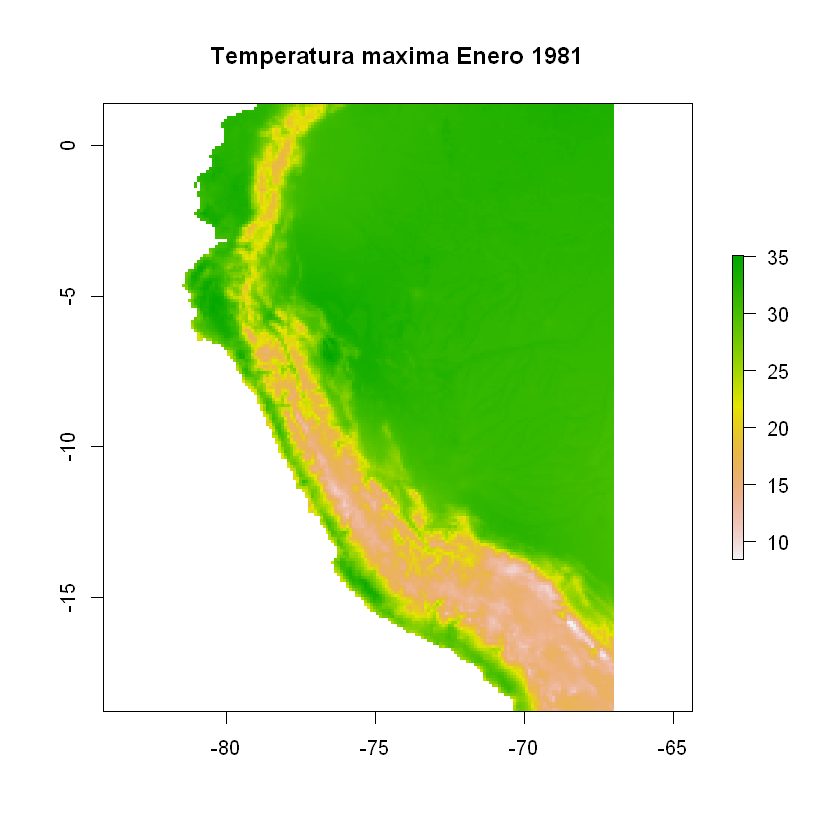

In [21]:
plot(tmp_max_enero, main= 'Temperatura maxima Enero 1981')

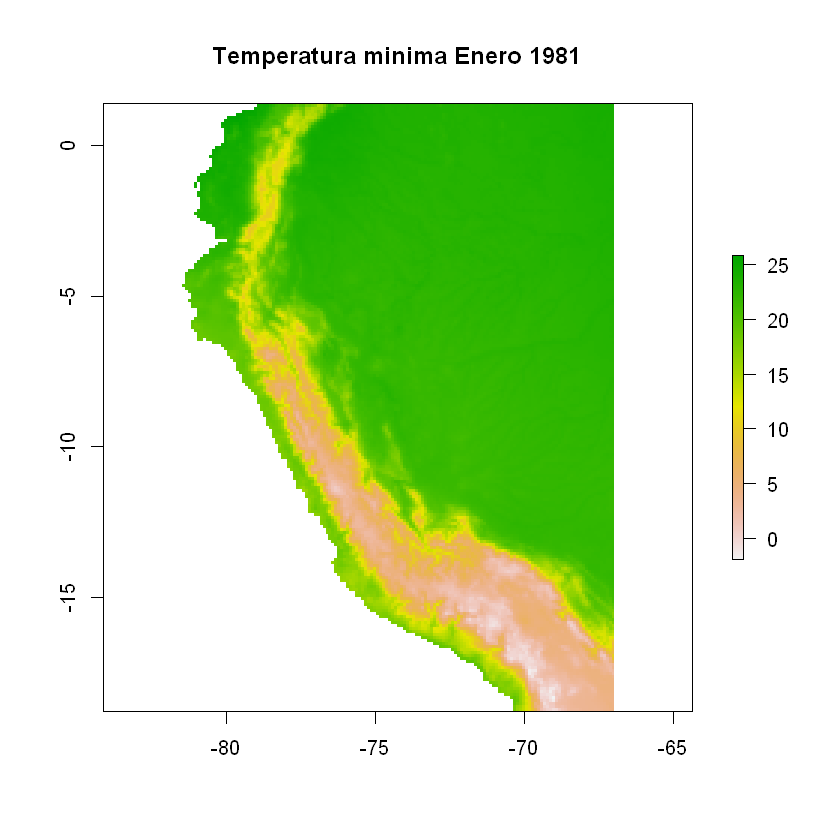

In [22]:
plot(tmp_min_enero,main= 'Temperatura minima Enero 1981')

# Calculo de la temperatura promedio enero 1981

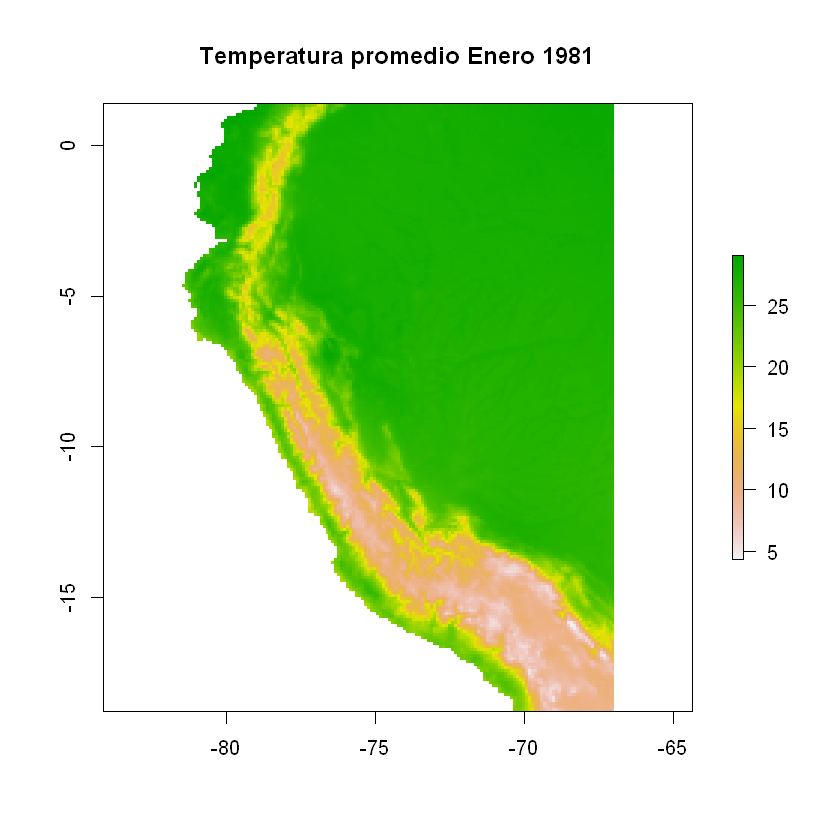

In [23]:
tmp_prom_enero=(tmp_max_enero+tmp_min_enero)/2
plot(tmp_prom_enero,main= 'Temperatura promedio Enero 1981')

# Lista con todos los arcivos contenidos en la carpeta de Tmax y Tmin

In [24]:
#Nos ubicamos en la carpeta de trabajo
setwd('d:/Proyectos_GitHub/curso_hidrologia/data/Temperatura/mensual')

In [25]:
lista_temp_max=list.files('tmax/',full.names = T)
lista_temp_min=list.files('tmin/',full.names = T)

In [26]:
lista_temp_max

[1] "tmax/Tmax_1981-01-01.tif" "tmax/Tmax_1981-02-01.tif"
 [3] "tmax/Tmax_1981-03-01.tif" "tmax/Tmax_1981-04-01.tif"
 [5] "tmax/Tmax_1981-05-01.tif" "tmax/Tmax_1981-06-01.tif"
 [7] "tmax/Tmax_1981-07-01.tif" "tmax/Tmax_1981-08-01.tif"
 [9] "tmax/Tmax_1981-09-01.tif" "tmax/Tmax_1981-10-01.tif"
[11] "tmax/Tmax_1981-11-01.tif" "tmax/Tmax_1981-12-01.tif"

podemos observar que tenemos una lista de 12 archivos correspondientes a las temperaturas maximas de enero-diciembre del año 1981. 

# Calculo de la evapotranspiración potencial utilizando la formula de Thornthwaite

$$\Large i_n=(\frac{t_n}{5})^{1.514}$$

$$\Large I= \sum_{n=1}^{12} i_n $$ 

In [27]:
I=0
indice_mensual=list()
temp_prom=list()
for (i in 1:12){
  temp_max=raster(lista_temp_max[i])
  temp_min=raster(lista_temp_min[i])
  
  temp_prom[i]=(temp_min+temp_max)/2
  
  #name=paste0('promedio/temp_prom_',as.character(i),'.tif')
  #writeRaster(temp_prom,name,overwrite=TRUE)
  indice_mensual[i]=(temp_prom[[i]]/5)**1.514
  
  I=I+indice_mensual[[i]]
}

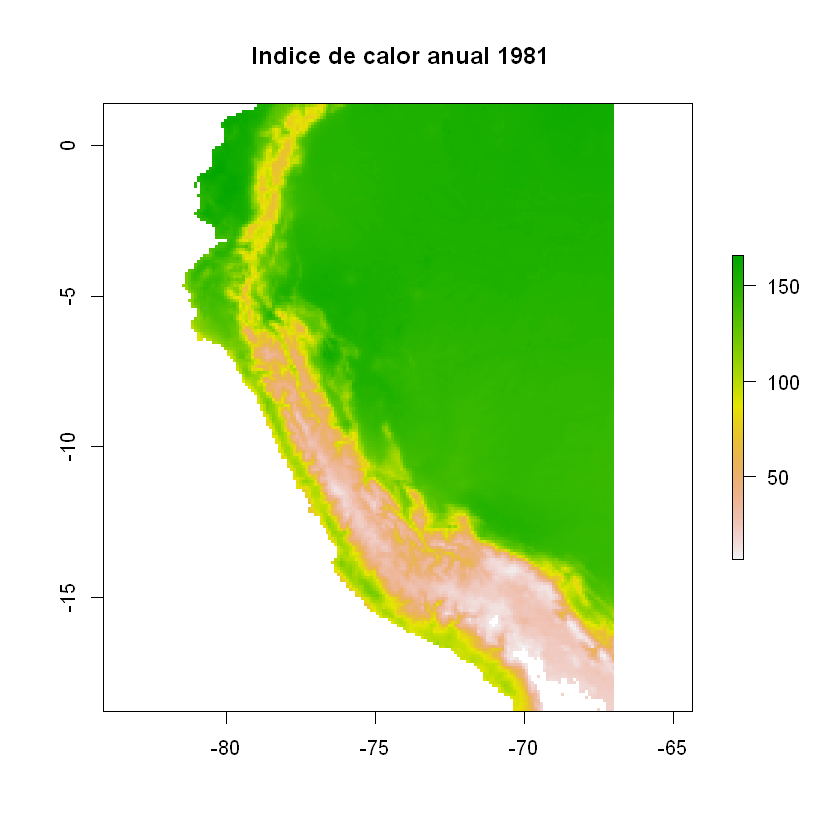

In [28]:
plot(I,main=' Indice de calor anual 1981')

In [29]:
ETP_mensual=list()

a=6.75*10^-7*I^3-7.71*10**-5*I**2+0.01792*I+0.49239

for (i in 1:12){
  ETP_mensual[i]=16*(10*temp_prom[[i]]/I)**a  
}

In [30]:
ETP_1981=stack(ETP_mensual)

In [36]:
#cambiando los nombre a ETP1-ETP12
names(ETP_1981)=unlist(lapply(1:12,function(x){paste0('ETP',as.character(x))}))

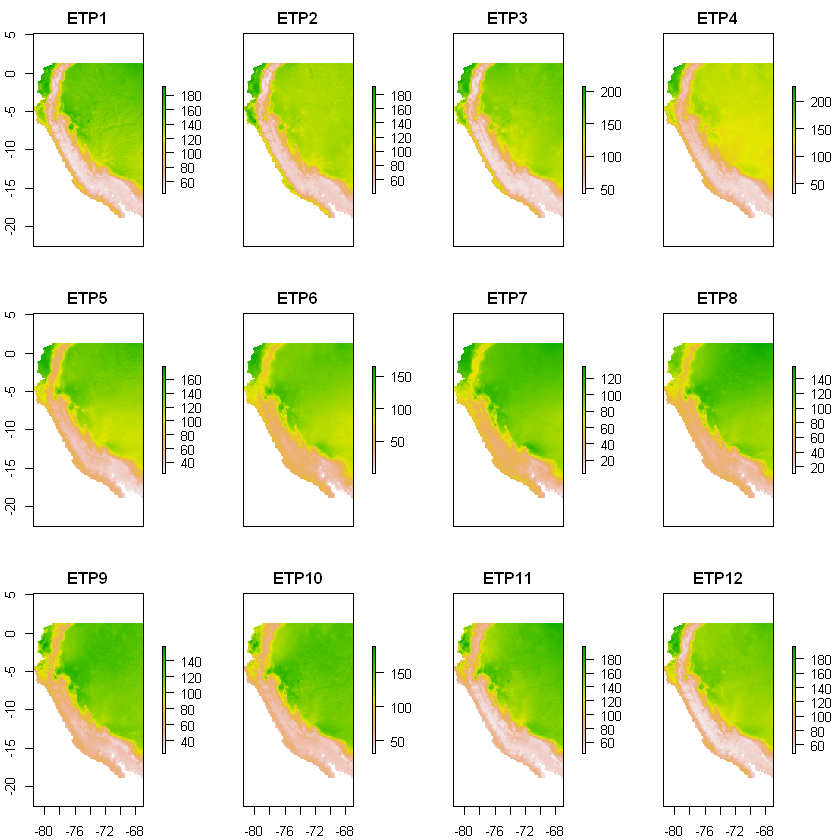

In [37]:
plot(ETP_1981)